# MNIST character recognization - boiler plate code
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset.

* http://yann.lecun.com/exdb/mnist/
* https://github.com/mrgloom/MNIST-dataset-in-different-formats

### This boiler plate code aims to give step-by-step instructions and illustration for building a simple 2-layer densely-connected neural network for MNIST image recognition.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data

from keras import backend as K

#Clear TF memory
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Import MNIST data from TensorFlow examples module and examine

In [2]:
mnist = input_data.read_data_sets('mnist/', one_hot=True, reshape=False) #One-hot-encoding is set to True
type(mnist)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


tensorflow.contrib.learn.python.learn.datasets.base.Datasets

### One-hot encoding
One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In the case of MNIST data, one-hot encoding turns a categorial variable like 3 to a vector [0 0 0 1 0 0 0 0 0 0 0] i.e. the 4th position of the 10-element vector is 1 and the rest is 0. The 10 positions of the array denotes 0 to 9, and so a 1 in the 4th position means this array represents 3.

Here is the idea,

![](one-hot-encoded.png)

** Shape and size **

In [3]:
print ("Shape of the MNIST training data:",mnist.train.images.shape) #Shape = False -> (55000, 28, 28, 1)
print ("Size of the MNIST training data:",mnist.train.images.size)

Shape of the MNIST training data: (55000, 28, 28, 1)
Size of the MNIST training data: 43120000


In [4]:
print ("Number of training examples:", mnist.train.num_examples)
print ("Number of test examples:", mnist.test.num_examples)
print ("Number of validation examples:", mnist.validation.num_examples)

Number of training examples: 55000
Number of test examples: 10000
Number of validation examples: 5000


## We need to flatten the image data in a vector, re-extract with _'reshape'_ True

Here is the idea,

![](flatten-array.png)

In [5]:
mnist = input_data.read_data_sets("mnist/", one_hot=True, reshape=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [6]:
print ("Shape of the MNIST training data:",mnist.train.images.shape) #Shape = True -> (55000, 784)
print ("Size of the MNIST training data:",mnist.train.images.size)

Shape of the MNIST training data: (55000, 784)
Size of the MNIST training data: 43120000


## Visualizing the data

In [7]:
#Examine the shape of one image data
mnist.train.images[5].shape

(784,)

** We flattened the vector so it has shape (784,). However, to plot the image, we need to reshape it to 28 x 28 pixels **

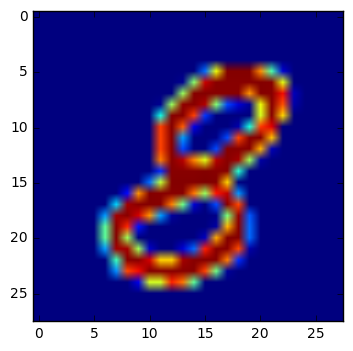

In [8]:
#Plot the normal image
plt.imshow(mnist.train.images[5].reshape(28,28))

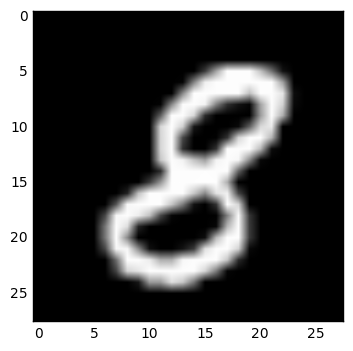

In [9]:
# plot the image in grayscale
plt.imshow(mnist.train.images[5].reshape(28,28), cmap='gray')

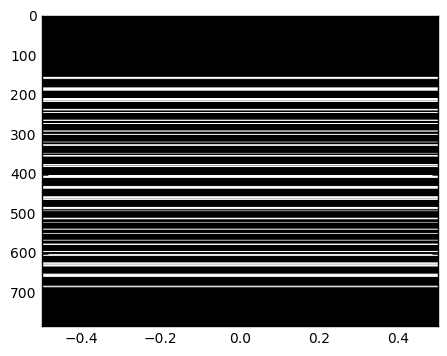

In [10]:
#Show the finite numbers in the data vector
plt.imshow(mnist.train.images[5].reshape(784,1), cmap='gray', aspect=0.001)

** Show a histogram of one image data vector. Most of the data is zero-valued **

(array([597.,   7.,   3.,   5.,   2.,   0.,   1.,   1.,   3.,   5.,   1.,
          5.,   0.,   6.,   0.,   0.,   1.,   0.,   1.,   2.,   0.,   2.,
          0.,   3.,   2.,   3.,   3.,   3.,   0.,   1.,   3.,   4.,   0.,
          0.,   4.,   3.,   1.,   3.,   4.,   3.,   1.,   8.,   3.,   3.,
          3.,   1.,   3.,   4.,   6.,  70.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

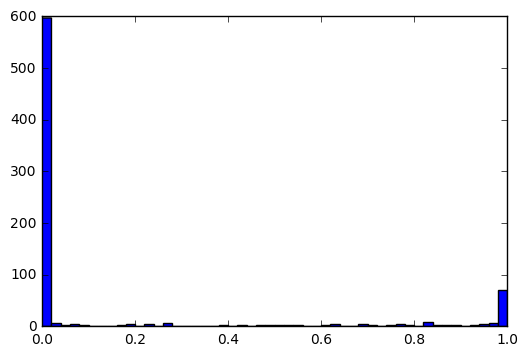

In [11]:
plt.hist(mnist.train.images[5], bins=50)

## Basic statistics about image data
### Data is already normalized

In [12]:
print ("Min value of the image vector", mnist.train.images[5].min())
print ("Max value of the image vector", mnist.train.images[5].max())
print ("Mean value of the image vector", mnist.train.images[5].mean())
print ("Standard deviation value of the image vector", mnist.train.images[5].std())

Min value of the image vector 0.0
Max value of the image vector 1.0
Mean value of the image vector 0.16789716
Standard deviation value of the image vector 0.34128505


### How does the Ground Truth label vector look like? Remember we extracted with 1-hot encoding

In [13]:
mnist.train.labels[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

### How does each example in dataset look like ? plot with subplots

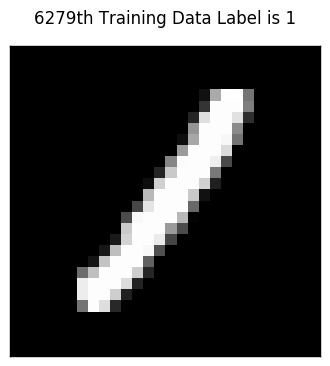

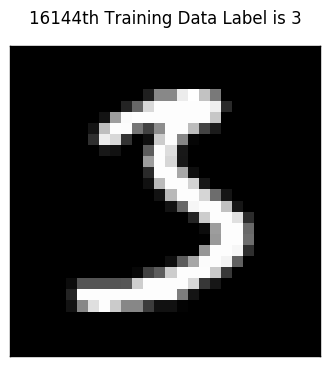

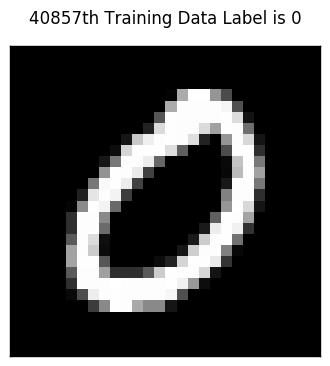

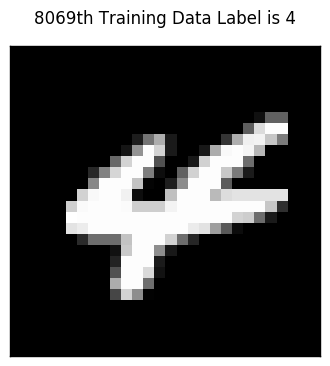

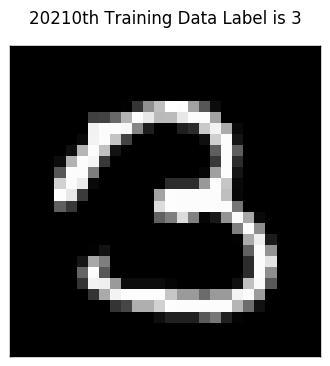

In [14]:
#How does each example in dataset look like 
num_examples = 5
train_images = mnist.train.images
train_labels = mnist.train.labels
random_idx = np.random.randint(train_images.shape[0], size=num_examples)

for i in random_idx:
    current_image = np.reshape(train_images[i, :], newshape=(28,28)) #Reshape the array of ith example (784 features) to (28*28 features)
    current_label = np.argmax(train_labels[i, :])                    #Label of the ith example
    
    plt.matshow(current_image, cmap=plt.get_cmap('gray'))
    plt.title("" + str(i) + "th Training Data " 
              + "Label is " + str(current_label))
    plt.xticks(())
    plt.yticks(())
#     print ("" + str(i) + "th Training Data " 
#            + "Label is " + str(current_label))

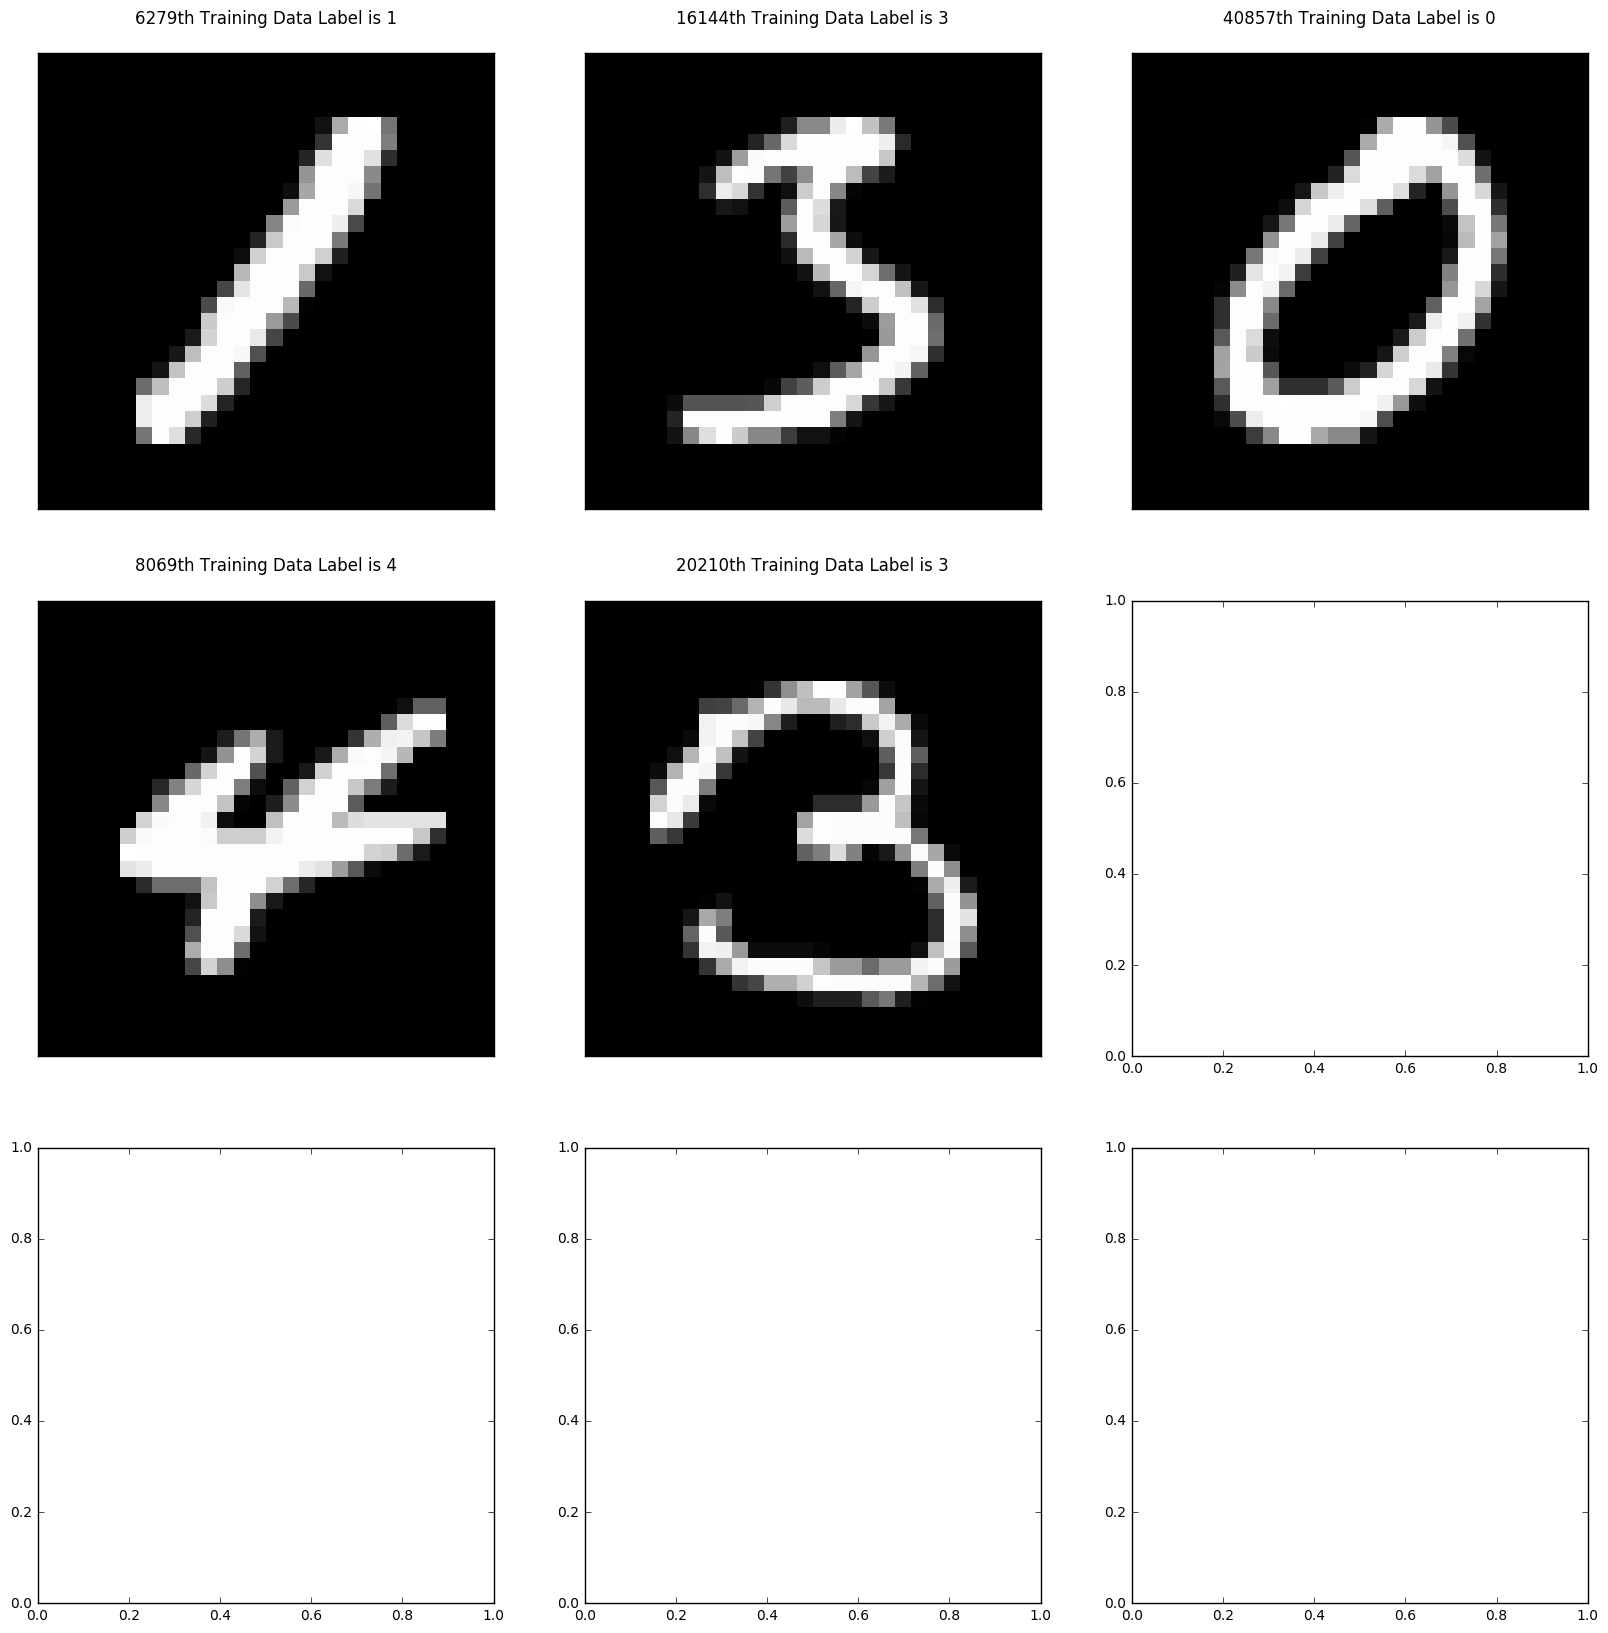

In [15]:
#Another method of subplots to show up the examples
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))

for i, ax in zip(random_idx, axes.ravel()):
    #Reshape i from 1x784 -> 28*28
    current_image = np.reshape(train_images[i, :], newshape=(28,28)) #Reshape the array of ith example (784 features) to (28*28 features)
    current_label = np.argmax(train_labels[i, :])
    
    ax.matshow(current_image, cmap=plt.get_cmap('gray'))
    ax.set_title("" + str(i) + "th Training Data " + "Label is " + str(current_label))
    ax.set_xticks(()) #Remove all the ticks
    ax.set_yticks(()) #Remove all the ticks

### Is there any correlation between image labels and the basic statistics of that vector e.g. mean or std. dev?

In [16]:
# Create list of mean, std. dev, and labels of the training image vectors for plotting
# Note, argmax function helps extracting the exact digit label from the one-hot encoded label vector
lmean=[]
lstd=[]
llabel=[]
for i in range (55000):
    lmean.append(mnist.train.images[i].mean())
    lstd.append(mnist.train.images[i].std())
    llabel.append(np.argmax(mnist.train.labels[i]))

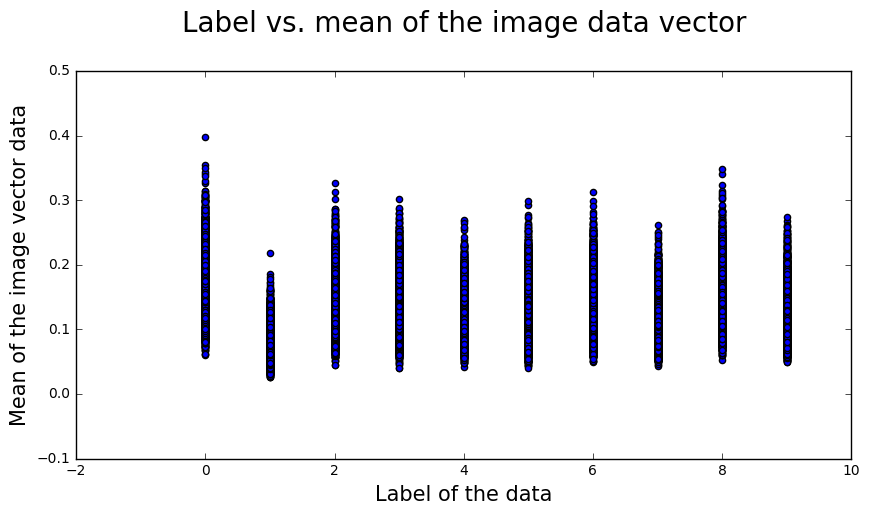

In [17]:
plt.figure(figsize=(10,5))
plt.title ("Label vs. mean of the image data vector\n", fontsize=20)
plt.xlabel("Label of the data",fontsize=15)
plt.ylabel("Mean of the image vector data",fontsize=15)
plt.scatter(llabel,lmean)

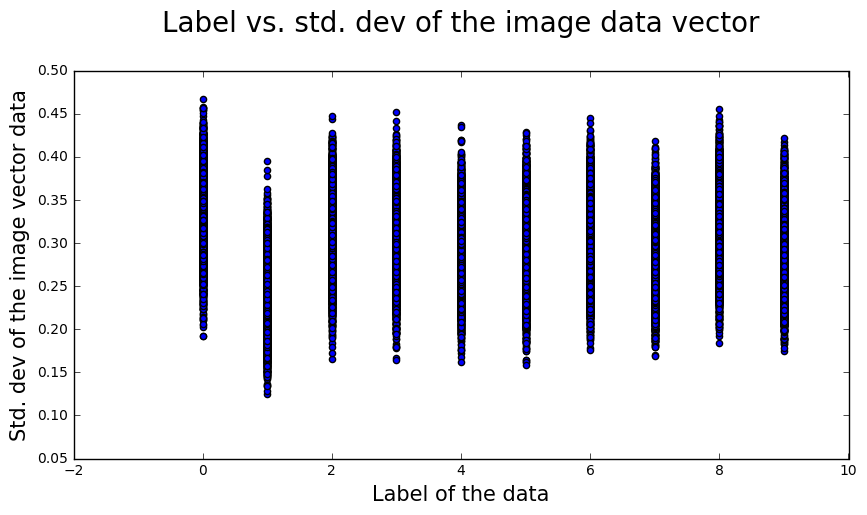

In [18]:
plt.figure(figsize=(10,5))
plt.title ("Label vs. std. dev of the image data vector\n", fontsize=20)
plt.xlabel("Label of the data",fontsize=15)
plt.ylabel("Std. dev of the image vector data",fontsize=15)
plt.scatter(llabel,lstd)

### Conclusion is, there is no apparent correlation between the basic statistics and the label for an image vector data. That means we need to perform advanced machine learning task to classify the images.

## Parameters and global variables
The variable n_hidden_layer determines the size of the hidden layer in the neural network. This is also known as the width of a layer.

In [19]:
#Params
learning_rate = 0.001
epochs = 20
batch_size = 100  # Decrease batch size if you don't have enough memory
display_step = 5
keep = 0.7

#Network Params
n_input = 784                            # MNIST data input (img shape: 28*28)
n_classes = mnist.train.labels.shape[1]  # MNIST total classes (0-9 digits)
n_hidden_layer = 800 # layer number of features

## Input data (as _tf.placeholder_)

In [20]:
#Placeholder
x = tf.placeholder(dtype=tf.float32, shape=[None, n_input])
y = tf.placeholder(dtype=tf.float32, shape=[None, n_classes])
keep_prob = tf.placeholder(dtype=tf.float32)

## Declare weights and bias terms (as _tf.Variables_)
Deep neural networks use multiple layers with each layer requiring it's own weight and bias. The 'hidden_layer' weight and bias is for the hidden layer. The 'out' weight and bias is for the output layer. If the neural network were deeper, there would be weights and biases for each additional layer.

In [21]:
stddev = 0.1

weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape=[3,3,1,64], stddev=stddev)),
    'wc2': tf.Variable(tf.truncated_normal(shape=[3,3,64,128], stddev=stddev)),
    'fc1': tf.Variable(tf.truncated_normal(shape=[7*7*128, 1024], stddev=stddev)),
    'out': tf.Variable(tf.truncated_normal(shape=[1024, n_classes], stddev=stddev))
}

biases = {
    'bc1': tf.Variable(tf.random_normal(shape=[64], stddev=stddev)),
    'bc2': tf.Variable(tf.random_normal(shape=[128], stddev=stddev)),
    'fc1': tf.Variable(tf.random_normal(shape=[1024], stddev=stddev)),
    'out': tf.Variable(tf.random_normal(shape=[n_classes], stddev=stddev))
}

### Show the shapes of the various tensors

In [22]:
print("Shape of the weights tensor of convolution layer 1:", weights['wc1'].shape)
print("Shape of the weights tensor of convolution layer 2:", weights['wc2'].shape)
print("Shape of the weights tensor of Fully Connected layer 1:", weights['fc1'].shape)
print("Shape of the weights tensor of output layer:", weights['out'].shape)
print("--------------------------------------------------------")
print("Shape of the bias tensor of convolution layer 1:", biases['bc1'].shape)
print("Shape of the bias tensor of convolution layer 2:", biases['bc2'].shape)
print("Shape of the bias tensor of Fully Connected layer 1:", biases['fc1'].shape)
print("Shape of the bias tensor of output layer:", biases['out'].shape)

Shape of the weights tensor of convolution layer 1: (3, 3, 1, 64)
Shape of the weights tensor of convolution layer 2: (3, 3, 64, 128)
Shape of the weights tensor of Fully Connected layer 1: (6272, 1024)
Shape of the weights tensor of output layer: (1024, 10)
--------------------------------------------------------
Shape of the bias tensor of convolution layer 1: (64,)
Shape of the bias tensor of convolution layer 2: (128,)
Shape of the bias tensor of Fully Connected layer 1: (1024,)
Shape of the bias tensor of output layer: (10,)


### Create a quick session to show the randomly initialized weight and bias tensor

In [23]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    wc1=sess.run(weights['wc1'])
    wc2=sess.run(weights['wc2'])
    w_fc1=sess.run(weights['fc1'])
    w_out=sess.run(weights['out'])
    
    bc1=sess.run(biases['bc1'])
    bc2=sess.run(biases['bc2'])
    b_fc1=sess.run(biases['fc1'])
    b_out=sess.run(biases['out'])

print("Weight wc1 tensor initialized randomly\n---------------------------------------\n", wc1)
print('Shape of the weight wc1 tensor', wc1.shape)
print(' ')
print("Weight wc2 tensor initialized randomly\n---------------------------------------\n", wc2)
print('Shape of the weight wc2 tensor', wc2.shape)
print(' ')
print("Weight w_fc1 tensor initialized randomly\n---------------------------------------\n", w_fc1)
print('Shape of the weight w_fc1 tensor', w_fc1.shape)
print(' ')
print("Weight w_out tensor initialized randomly\n---------------------------------------\n", w_out)
print('Shape of the weight w_out tensor', w_out.shape)
print(' ')
print("Bias bc1 tensor initialized randomly\n---------------------------------------\n", bc1)
print('Shape of the bias bc1 tensor', bc1.shape)
print(' ')
print("Bias bc2 tensor initialized randomly\n---------------------------------------\n", bc2)
print('Shape of the bias bc2 tensor', bc2.shape)
print(' ')
print("Bias b_fc1 tensor initialized randomly\n---------------------------------------\n", b_fc1)
print('Shape of the bias b_fc1 tensor', b_fc1.shape)
print(' ')
print("Bias b_out tensor initialized randomly\n---------------------------------------\n", b_out)
print('Shape of the bias b_out tensor', b_out.shape)
sess.close()

Weight wc1 tensor initialized randomly
---------------------------------------
 [[[[ 0.00983191 -0.03703265  0.00609509 -0.00455995  0.1400745
     0.01099997 -0.06414958 -0.17111184  0.03930924  0.0692644
     0.19507693  0.04145254  0.00174609 -0.13280001  0.08034677
     0.14361185  0.06098282 -0.12496465  0.03410155  0.03449921
     0.13535617 -0.03523322  0.02599539  0.19682191  0.03390008
    -0.13965687 -0.10151932  0.06245151  0.04395331  0.02737283
     0.02106162 -0.07968656  0.02018036  0.13265845  0.08994281
    -0.05947668  0.12008885 -0.15025398  0.09051402 -0.14963354
     0.04045386  0.00927411 -0.05794623 -0.15063141  0.11779354
     0.06476861  0.07612113 -0.05989814  0.07506273  0.00084153
    -0.07471567 -0.01942682 -0.0360454  -0.05530003  0.04530362
     0.00309103  0.06234365  0.00470923  0.10222373  0.16099319
     0.08298191  0.09668578  0.11898191  0.12164551]]

  [[ 0.12294288  0.01198442 -0.18855523 -0.03915199  0.02537105
    -0.03544868  0.04934498 -0.1015

## Define CNN basic function

In [24]:
def conv_basic(x, weights, biases, keep_prob):
    #reshape input from [784] -> [-1, 28, 28, 1]
    input_r = tf.reshape(x, shape=[-1, 28, 28, 1])
    
    #Conv layer 1
    conv1 = tf.nn.conv2d(input_r, filter=weights['wc1'], strides=[1,1,1,1], padding='SAME')
    mean, variance = tf.nn.moments(conv1, axes=[0,1,2]) #Calculate the mean and variance of the conv1, more than 1-D axes = [0,1,2], 1-D axes = [0]
    conv1 = tf.nn.batch_normalization(conv1, mean=mean, variance=variance, offset=0, scale=1, variance_epsilon=0.0001)
    conv1 = tf.nn.relu(tf.nn.bias_add(conv1, bias=biases['bc1']))
    pool1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    pool1_dr = tf.nn.dropout(pool1, keep_prob=keep_prob)
    
    #Conv layer 2
    conv2 = tf.nn.conv2d(pool1_dr, filter=weights['wc2'], strides=[1,1,1,1], padding='SAME')
    mean, variance = tf.nn.moments(conv2, axes=[0,1,2])
    conv2 = tf.nn.batch_normalization(conv2, mean=mean, variance=variance, offset=0, scale=1, variance_epsilon=0.0001)
    conv2 = tf.nn.relu(tf.nn.bias_add(conv2, bias=biases['bc2']))
    pool2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    pool2_dr = tf.nn.dropout(pool2, keep_prob=keep_prob)
    
    #Vectorize
    dense = tf.reshape(pool2_dr, shape=[-1, weights['fc1'].get_shape().as_list()[0]])
    
    #Fully connected layer 1
    fc1 = tf.nn.relu(tf.add(tf.matmul(dense, weights['fc1']), biases['fc1']))
    fc1_dr = tf.nn.dropout(fc1, keep_prob=keep_prob)
    
    #Fully connected layer 2
    out = tf.add(tf.matmul(fc1_dr, weights['out']), biases['out'])
    
    #Return all the layers
    out = {
        'input_r': input_r,
        'conv1': conv1,
        'pool1': pool1,
        'pool1_dr': pool1_dr,
        'conv2': conv2,
        'pool2': pool2,
        'pool2_dr': pool2_dr,
        'dense': dense,
        'fc1': fc1,
        'fc1_dr': fc1_dr,
        'out': out,
    }
    
    return out

## Hidden and output layers definition (using TensorFlow mathematical functions)

In [25]:
y_pred = conv_basic(x, weights, biases, keep_prob)['out']

## Cost function and Optimizer (using TensorFlow cost and optimizer objects)

### Softmax activation for the output:
We are using the softmax function, or normalized exponential function, for the output prediction. It is a generalization of the logistic function that "squashes" a K-dimensional vector z of arbitrary real values to a K-dimensional vector σ(__z__) of real values in the range [0, 1] that add up to 1. The function is given by:

$${\displaystyle \sigma (\mathbf {z} )_{j}={\frac {e^{z_{j}}}{\sum _{k=1}^{K}e^{z_{k}}}}}$$

### Cross-entropy loss function:
We are using cross-entropy loss as cost function. It is given by the following formula,

$${\displaystyle H(p,q)\ =\ -\sum _{i}p_{i}\log q_{i}\ =\ -y\log {\hat {y}}-(1-y)\log(1-{\hat {y}})}$$

where ${\hat{y}}$ is the predicted output and ${y}$ is the ground truth label.

### Gradient descent optimizer for training (backpropagation):
For the training of the neural network we need to perform __backpropagation__ i.e. propagate the errors, calculated by this cost function, backwards through the layers all the way up to the input weights and bias in order to adjust them accordingly (minimize the error). This involves taking first-order derivatives of the activation functions and applying chain-rule to ___'multiply'___ the effect of various layers as the error propagates back.

You can read more on this here: [Backpropagation in Neural Network](https://en.wikipedia.org/wiki/Backpropagation)

Fortunately, TensorFlow already implicitly implements this step i.e. takes care of all the chained differentiations for us. All we need to do is to specify an Optimizer object and pass on the cost function. Here, we are using a Gradient Descent Optimizer.

Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or of the approximate gradient) of the function at the current point.

You can read more on this: [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent)

In [26]:
#Define loss function and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



## Define Test and accuracy
We can check the correctness of the predicted output by applying the computation graph on to a test set (we will do that during the training of the network to show how the accuracy of the prediction improves over each training epoch).

To test correctness we just need to compare the output (after softmax activation) to the ground truth. This is accomplished by the first line of the code below.

However, to calculate the overall accuracy, we need to know the percentage of the correct predictions out of all predictions. Because the ___correct_prediction___ is just an array of Boolean values, we can simply typecast it to floating point numbers (1.0 and 0.0) and take the average. The number of 1's as a percentage of total count will be the average and also the desired accuracy. This is accomplished by the 2nd line of code below.

** Note, at this point, these are just more formula added to the computational graph. You still have to run them within a session to actually compute the values **

In [27]:
#Define correct_pred and accuracry functions
correct_pred = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [28]:
#Init function
init = tf.global_variables_initializer()

## Model saver

In [29]:
#Saver function to save model
save_step = 1
saver = tf.train.Saver(max_to_keep=3)

## TensorFlow Session for training and loss estimation
The MNIST library in TensorFlow provides the ability to receive the dataset in batches. Calling the  *** mnist.train.next_batch() function *** returns a subset of the training data. 

In [40]:
# Empty lists for book-keeping purpose
epoch=0
loss_batch = []
log_epoch = []
epoch_count = []
train_acc = []
test_acc = []

sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True))
sess.run(init)

# Get the first batch. Tuple unpacking from the next_batch output
batch_x, batch_y = mnist.train.next_batch(batch_size)
# Initial loss/cost
_, l1 = sess.run([optimizer, loss], feed_dict={x: batch_x, y: batch_y, keep_prob: keep})
if (epoch == 0):
    print ("Initial loss:", l1)

for epoch in range(epochs):
    avg_loss = 0
    total_batch = int(mnist.train.num_examples/batch_size)
    
    #Loop over all batches
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        #Fit training using batch data
        _, l = sess.run([optimizer,loss], feed_dict={x: batch_x, y: batch_y, keep_prob: keep})
        loss_batch.append(l) #Save the loss for every batch
        
        #Compute avg loss
        avg_loss += sess.run(loss, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0}) / total_batch
    
    epoch_count.append(epoch+1) #Save the epoch count
    log_epoch.append(len(loss_batch)) #Save the batch count when epoch finnished
    
    #Append each epoch accuracy to the list
    training_accuracy = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
    train_acc.append(training_accuracy)
    test_accuracy = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0})
    test_acc.append(test_accuracy)
        
    #Display logs per epoch step
    if epoch % display_step == 0:
        print('Epoch: %03d/%03d,     loss: %.4f' % (epoch, epochs, avg_loss))
        training_accuracy = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        test_accuracy = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0})
        print('-->    Training Accuracy: ', training_accuracy)
        print('-->    Test Accuracy: ', test_accuracy)
        
    #Save model
    if epoch % save_step == 0:
        saver.save(sess=sess, save_path= 'saved_models/cnn_mnist_basic.ckpt-' + str(epoch))

# Save the output vectors and prediction vectors in two variables for later examination
op = sess.run(y_pred, feed_dict={x:mnist.test.images, keep_prob: 1.0})
pred = sess.run(correct_pred, feed_dict={x:mnist.test.images, y:mnist.test.labels, keep_prob: 1.0})   
        
print('Last Accuracy for test set: ', test_accuracy)

Initial loss: 40.93975
Epoch: 000/020,     loss: 0.6201
-->    Training Accuracy:  0.97
-->    Test Accuracy:  0.9698
Epoch: 005/020,     loss: 0.0350
-->    Training Accuracy:  0.98
-->    Test Accuracy:  0.9877
Epoch: 010/020,     loss: 0.0195
-->    Training Accuracy:  1.0
-->    Test Accuracy:  0.9904
Epoch: 015/020,     loss: 0.0101
-->    Training Accuracy:  1.0
-->    Test Accuracy:  0.9905
Last Accuracy for test set:  0.9931


## Loss and accuracy plots

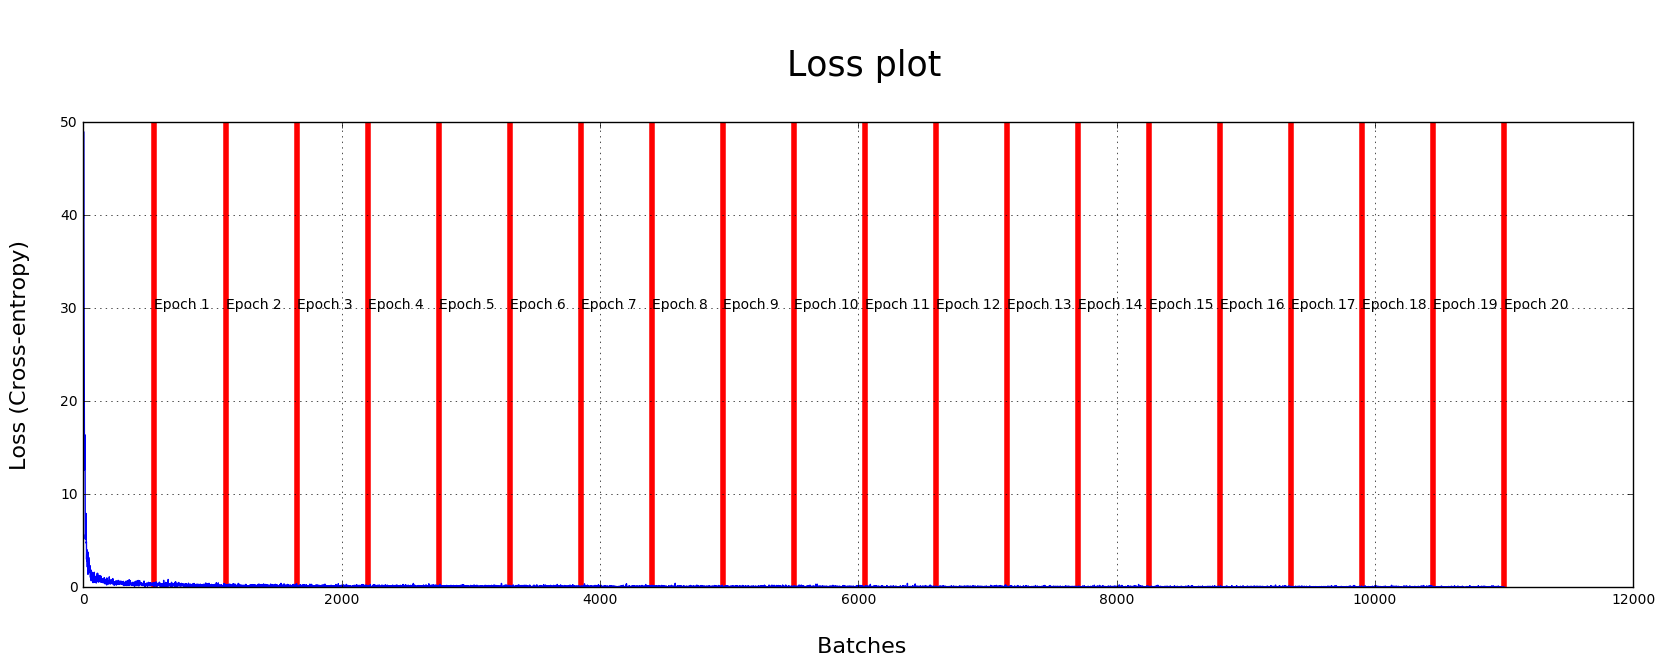

In [55]:
plt.figure(figsize=(20,6))
plt.title("\n Loss plot\n", fontsize=25)
plt.xlabel("\n Batches", fontsize=16)
plt.ylabel("Loss (Cross-entropy)\n", fontsize=16)
for i in range(len(log_epoch)):
    plt.axvline(x=log_epoch[i], lw=4, color='red')
    plt.text(x=log_epoch[i], y=30, s="Epoch {}".format(epoch_count[i]), fontsize=10)
plt.plot(loss_batch)
plt.grid(True)
plt.show()

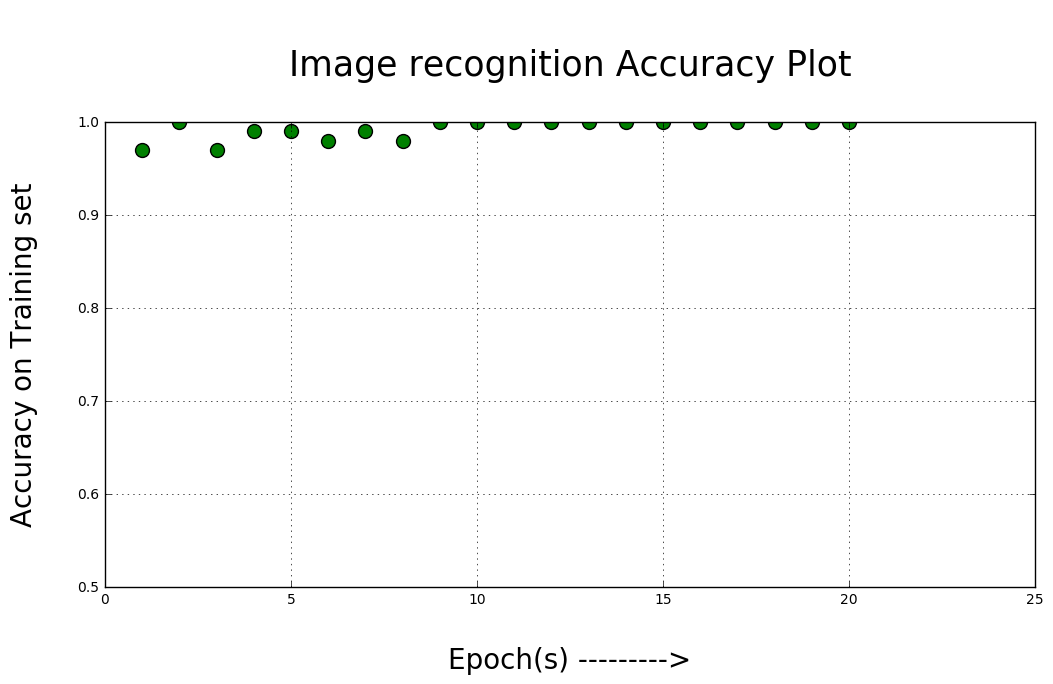

In [61]:
plt.figure(figsize=(12,6))
plt.title("\nImage recognition Accuracy Plot\n",fontsize=25)
plt.xlabel("\nEpoch(s) --------->",fontsize=20)
plt.ylabel("Accuracy on Training set\n",fontsize=20)
plt.ylim((0.5,1.0))
plt.scatter(epoch_count, train_acc, edgecolors='black', color='green',s=100)
plt.grid(True)   

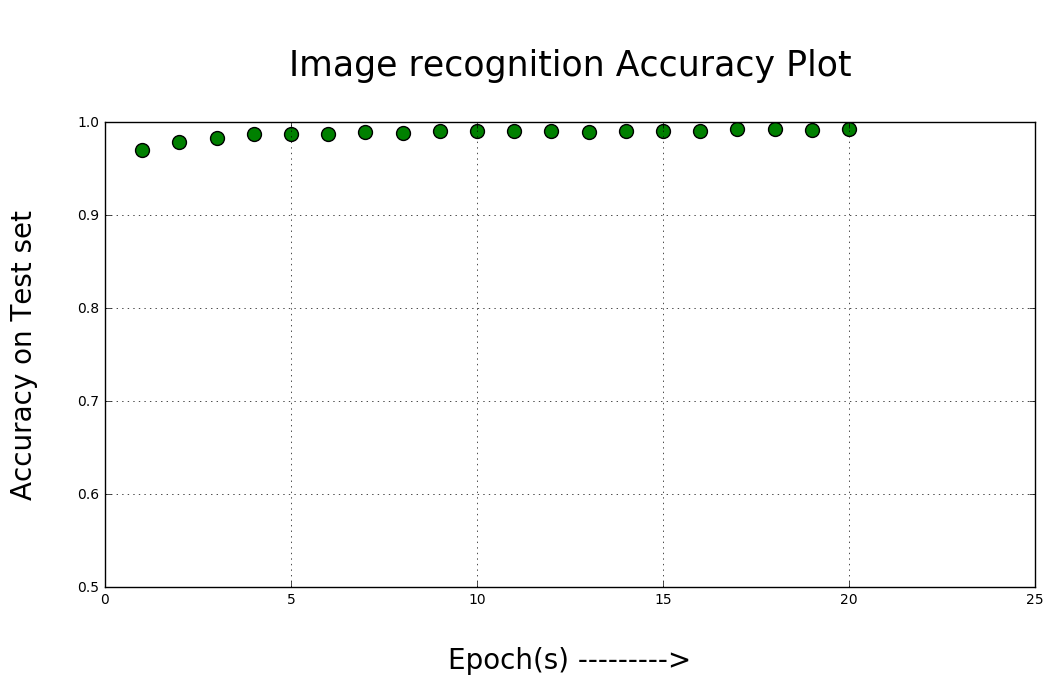

In [62]:
plt.figure(figsize=(12,6))
plt.title("\nImage recognition Accuracy Plot\n", fontsize=25)
plt.xlabel("\nEpoch(s) --------->", fontsize=20)
plt.ylabel("Accuracy on Test set\n", fontsize=20)
plt.ylim((0.5,1.0))
plt.scatter(epoch_count, test_acc, edgecolors='black', color='green',s=100)
plt.grid(True) 

## But what, exactly, does the output look like?
** How does the prediction vector look like?**

In [63]:
# Shape of the prediction vector
pred.shape

(10000,)

In [65]:
# Print only first 20 elements
pred[:20]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True])

In [66]:
# Shape of the output tensor
op.shape

(10000, 10)

** It looks like 5th prediction is True, so we examine it in detail **

In [67]:
# 5th element of the output tensor
op[4]

array([ -7.5602856 ,  -4.0547404 ,  -5.437025  , -16.735563  ,
        25.618746  , -10.091872  ,  -8.881355  ,  -0.39520907,
        -0.8731774 ,  11.833135  ], dtype=float32)

** So, op[4] is just an array of numbers, we need to apply softmax over it to turn these numbers into probabilities **

4


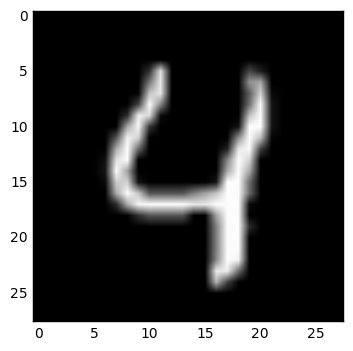

In [75]:
# Softmax on the 5th element of the output tensor
op5 = np.argmax(op[4], axis=0)
print(op5)
plt.imshow(mnist.test.images[4].reshape(28,28),cmap='gray')

In [84]:
#y_test labels and predicted test labels from the model
y_test = mnist.test.labels #in one-hot encoded
y_test = np.argmax(y_test, 1) #array of ground truth labels
print('Array of grouth truth labels: ', y_test)

predicted = sess.run(y_pred, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0})
predicted = np.argmax(predicted, 1)
print('Array of predicted labels: ', predicted)

Array of grouth truth labels:  [7 2 1 ... 4 5 6]
Array of predicted labels:  [7 2 1 ... 4 5 6]


## Build Confusion matrix

In [85]:
#Build Confusion matrix plot function

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [90]:
cfs_matrix = confusion_matrix(y_pred=predicted, y_true=y_test)
cfs_matrix.shape

(10, 10)

Confusion matrix, without normalization
[[ 976    0    1    0    0    0    1    1    1    0]
 [   0 1132    2    0    0    0    0    1    0    0]
 [   1    0 1025    0    1    0    0    5    0    0]
 [   0    0    1 1002    0    4    0    1    2    0]
 [   0    0    0    0  970    0    3    1    0    8]
 [   0    0    0    3    0  887    1    0    1    0]
 [   3    3    0    0    1    1  949    0    1    0]
 [   0    2    1    0    0    0    0 1024    1    0]
 [   1    0    2    1    1    1    0    1  966    1]
 [   0    0    0    0    4    2    0    3    0 1000]]


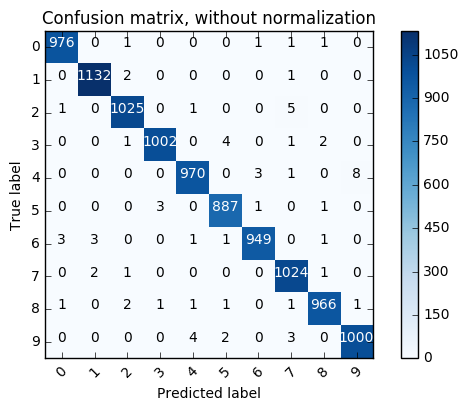

In [89]:
classes_name = np.array(['0','1','2','3','4','5','6','7','8','9',])

#Plot non_normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm=cfs_matrix, classes=classes_name, title='Confusion matrix, without normalization')

# Let's see how CNN works and inside each layer

In [ ]:
out = {
        'input_r': input_r,
        'conv1': conv1,
        'pool1': pool1,
        'pool1_dr': pool1_dr,
        'conv2': conv2,
        'pool2': pool2,
        'pool2_dr': pool2_dr,
        'dense': dense,
        'fc1': fc1,
        'fc1_dr': fc1_dr,
        'out': out,
    }

In [134]:
conv_out = conv_basic(x, weights, biases, keep_prob)

input_r = sess.run(conv_out['input_r'], feed_dict={x: mnist.train.images[0:1, :], keep_prob: 1.0})
conv1 = sess.run(conv_out['conv1'], feed_dict={x: mnist.train.images[0:1, :], keep_prob: 1.0})
pool1 = sess.run(conv_out['pool1'], feed_dict={x: mnist.train.images[0:1, :], keep_prob: 1.0})
fc1 = sess.run(conv_out['pool1_dr'], feed_dict={x: mnist.train.images[0:1, :], keep_prob: 1.0})
out = sess.run(conv_out['out'], feed_dict={x: mnist.train.images[0:1, :], keep_prob: 1.0})

## Input layer

Size of input_r is (1, 28, 28, 1)
Label is 4


([], <a list of 0 Text yticklabel objects>)

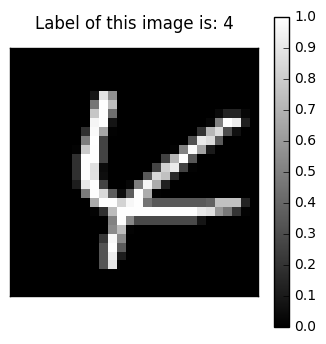

In [106]:
print('Size of input_r is', input_r.shape)
label = np.argmax(mnist.train.labels[0, :])
print('Label is %d' % label)

#Plot
plt.matshow(input_r[0,:,:,0], cmap=plt.get_cmap('gray'))
plt.title('Label of this image is: ' + str(label))
plt.colorbar()
plt.xticks(())
plt.yticks(())

## Conv1 layer

In [128]:
conv1.shape

(1, 28, 28, 64)

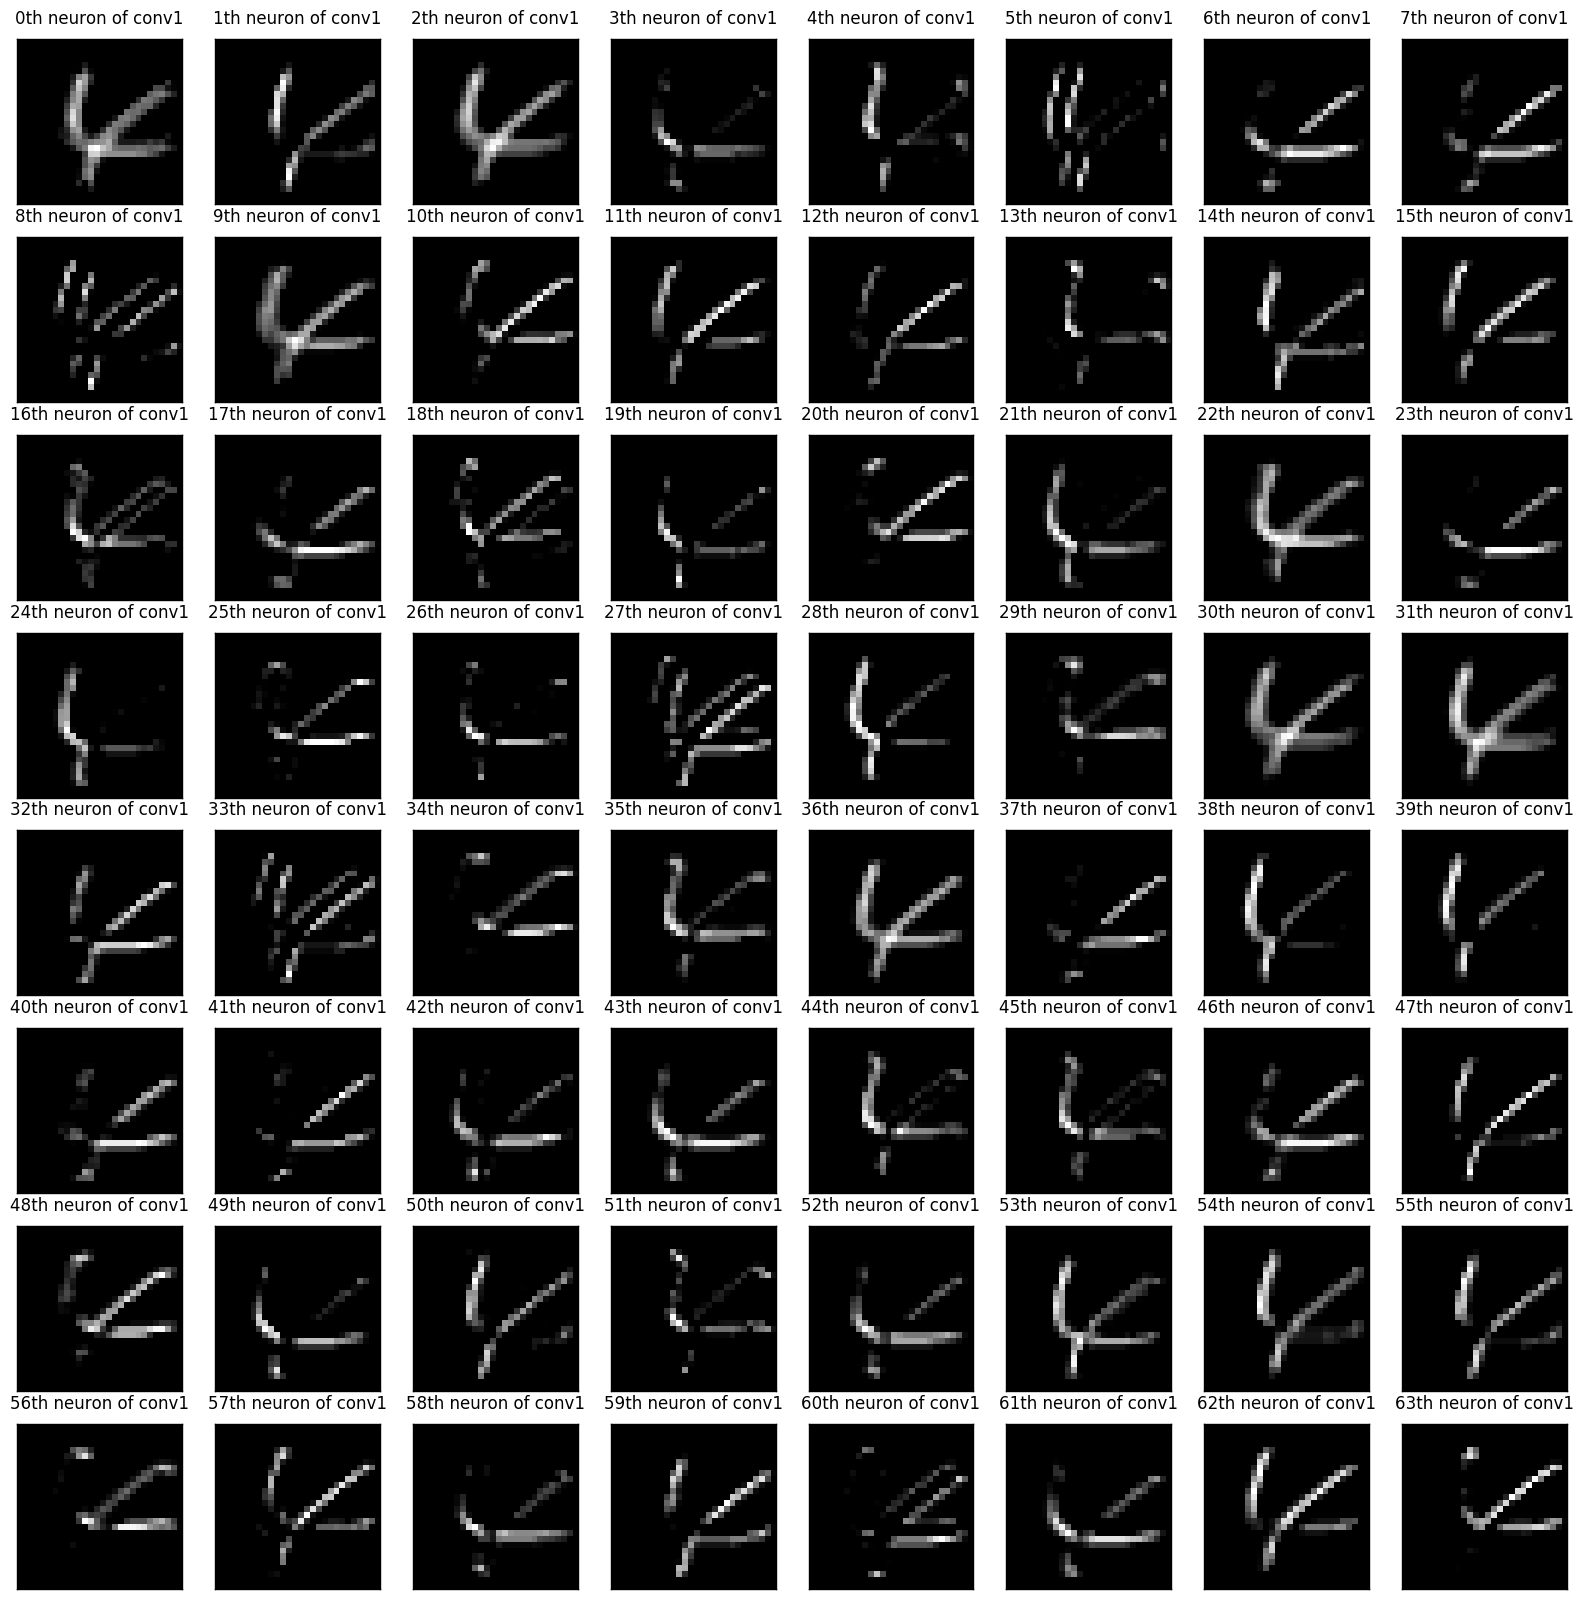

In [129]:
#Create a array iterations of 64 layers
iters = [i for i in range(conv1.shape[3])]

fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(20,20))

for i, ax in zip(iters, axes.ravel()):
    
    ax.matshow(conv1[0, :, :, i], cmap=plt.get_cmap('gray'))
    ax.set_title("" + str(i) + "th neuron of conv1")
    ax.set_xticks(()) #Remove all the ticks
    ax.set_yticks(()) #Remove all the ticks

## Pool1 layer

In [138]:
pool1.shape

(1, 14, 14, 64)

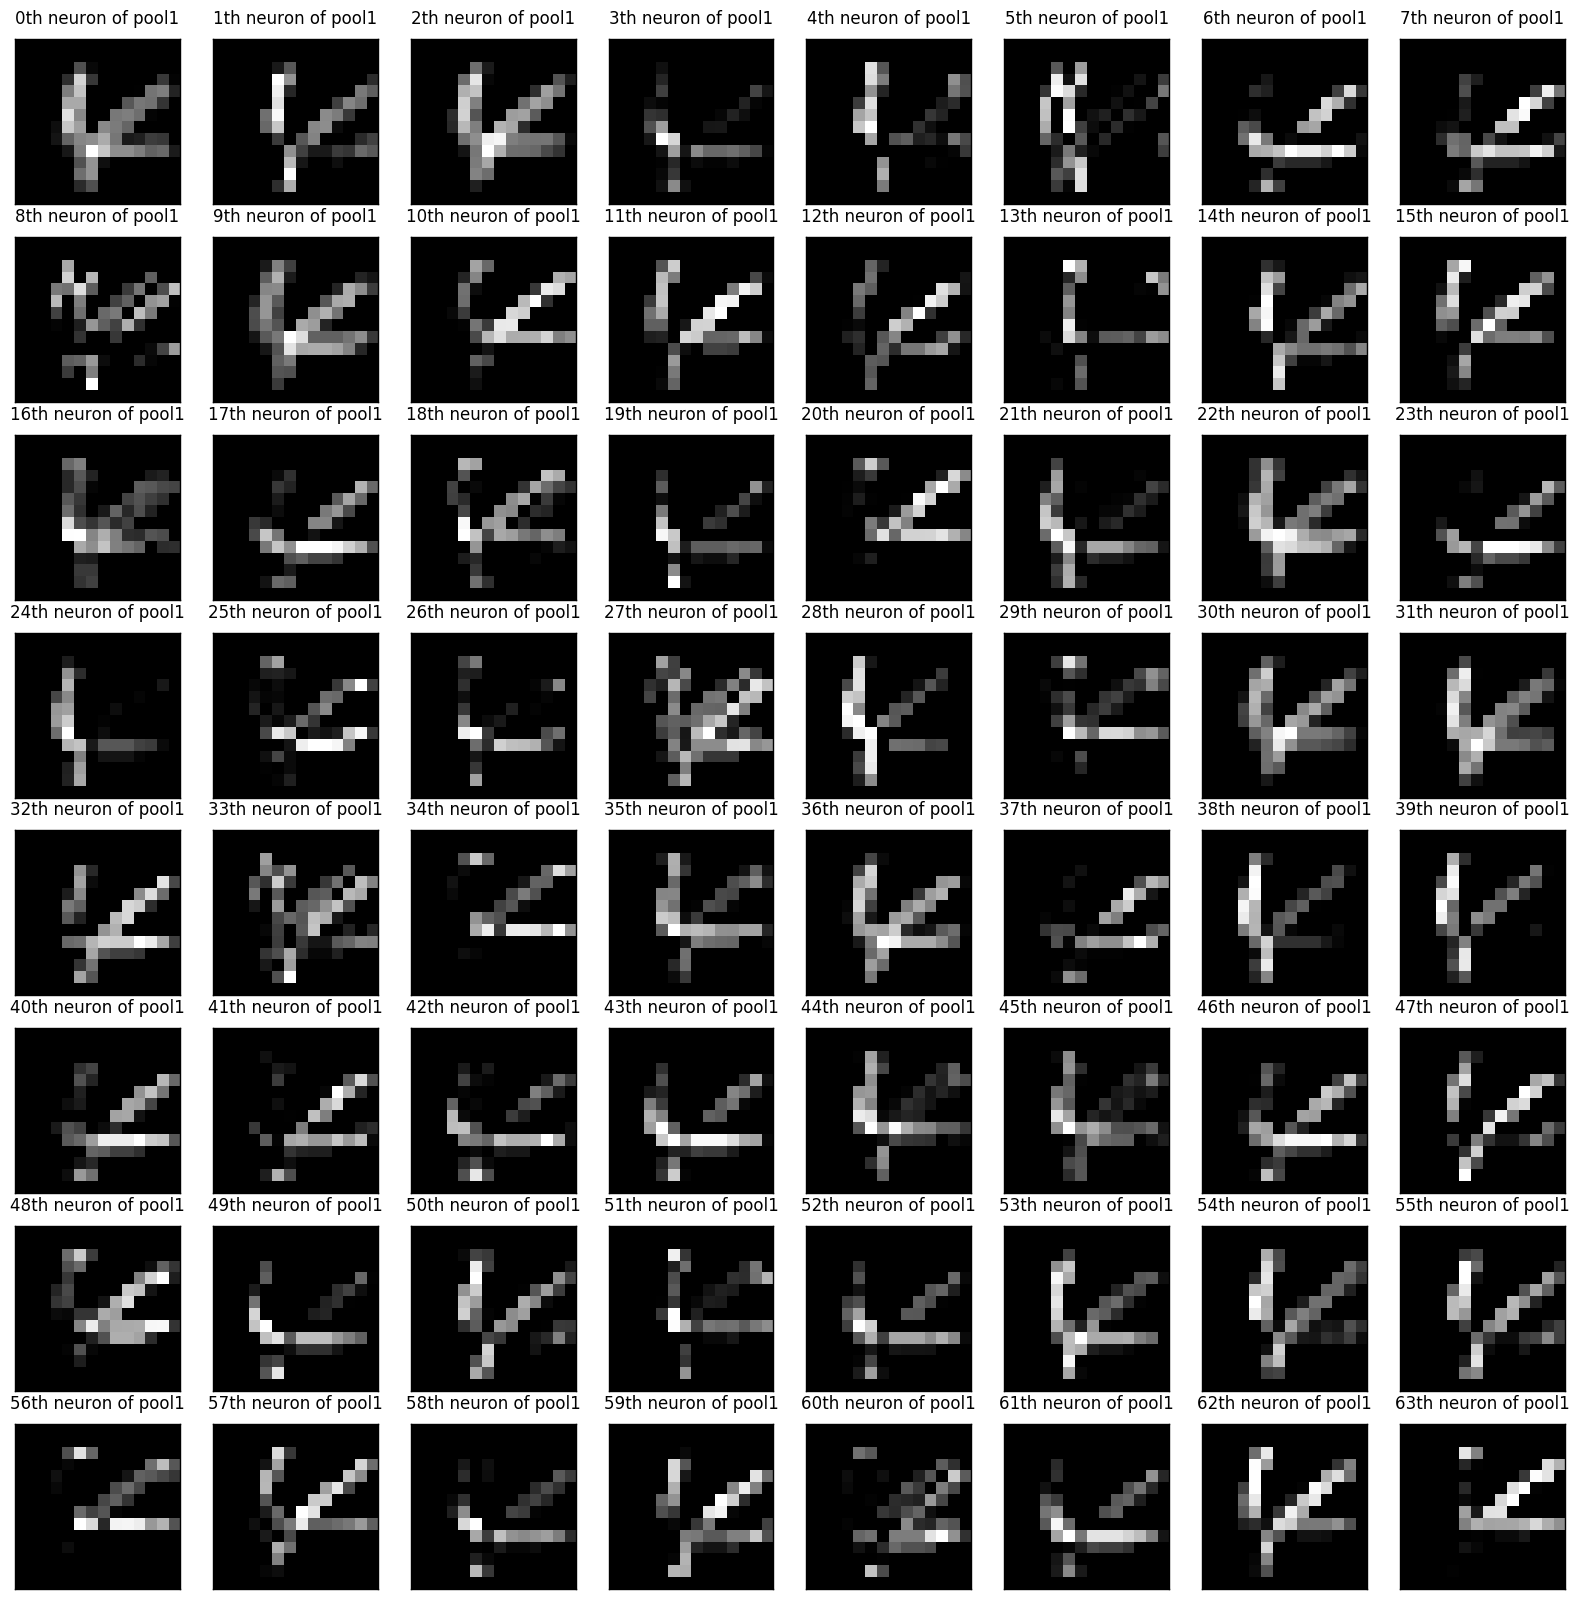

In [140]:
#Create a array iterations of 64 layers
iters = [i for i in range(pool1.shape[3])]

fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(20,20))

for i, ax in zip(iters, axes.ravel()):
    
    ax.matshow(pool1[0, :, :, i], cmap=plt.get_cmap('gray'))
    ax.set_title("" + str(i) + "th neuron of pool1")
    ax.set_xticks(()) #Remove all the ticks
    ax.set_yticks(()) #Remove all the ticks

## fc1 layer

In [141]:
fc1.shape

(1, 14, 14, 64)

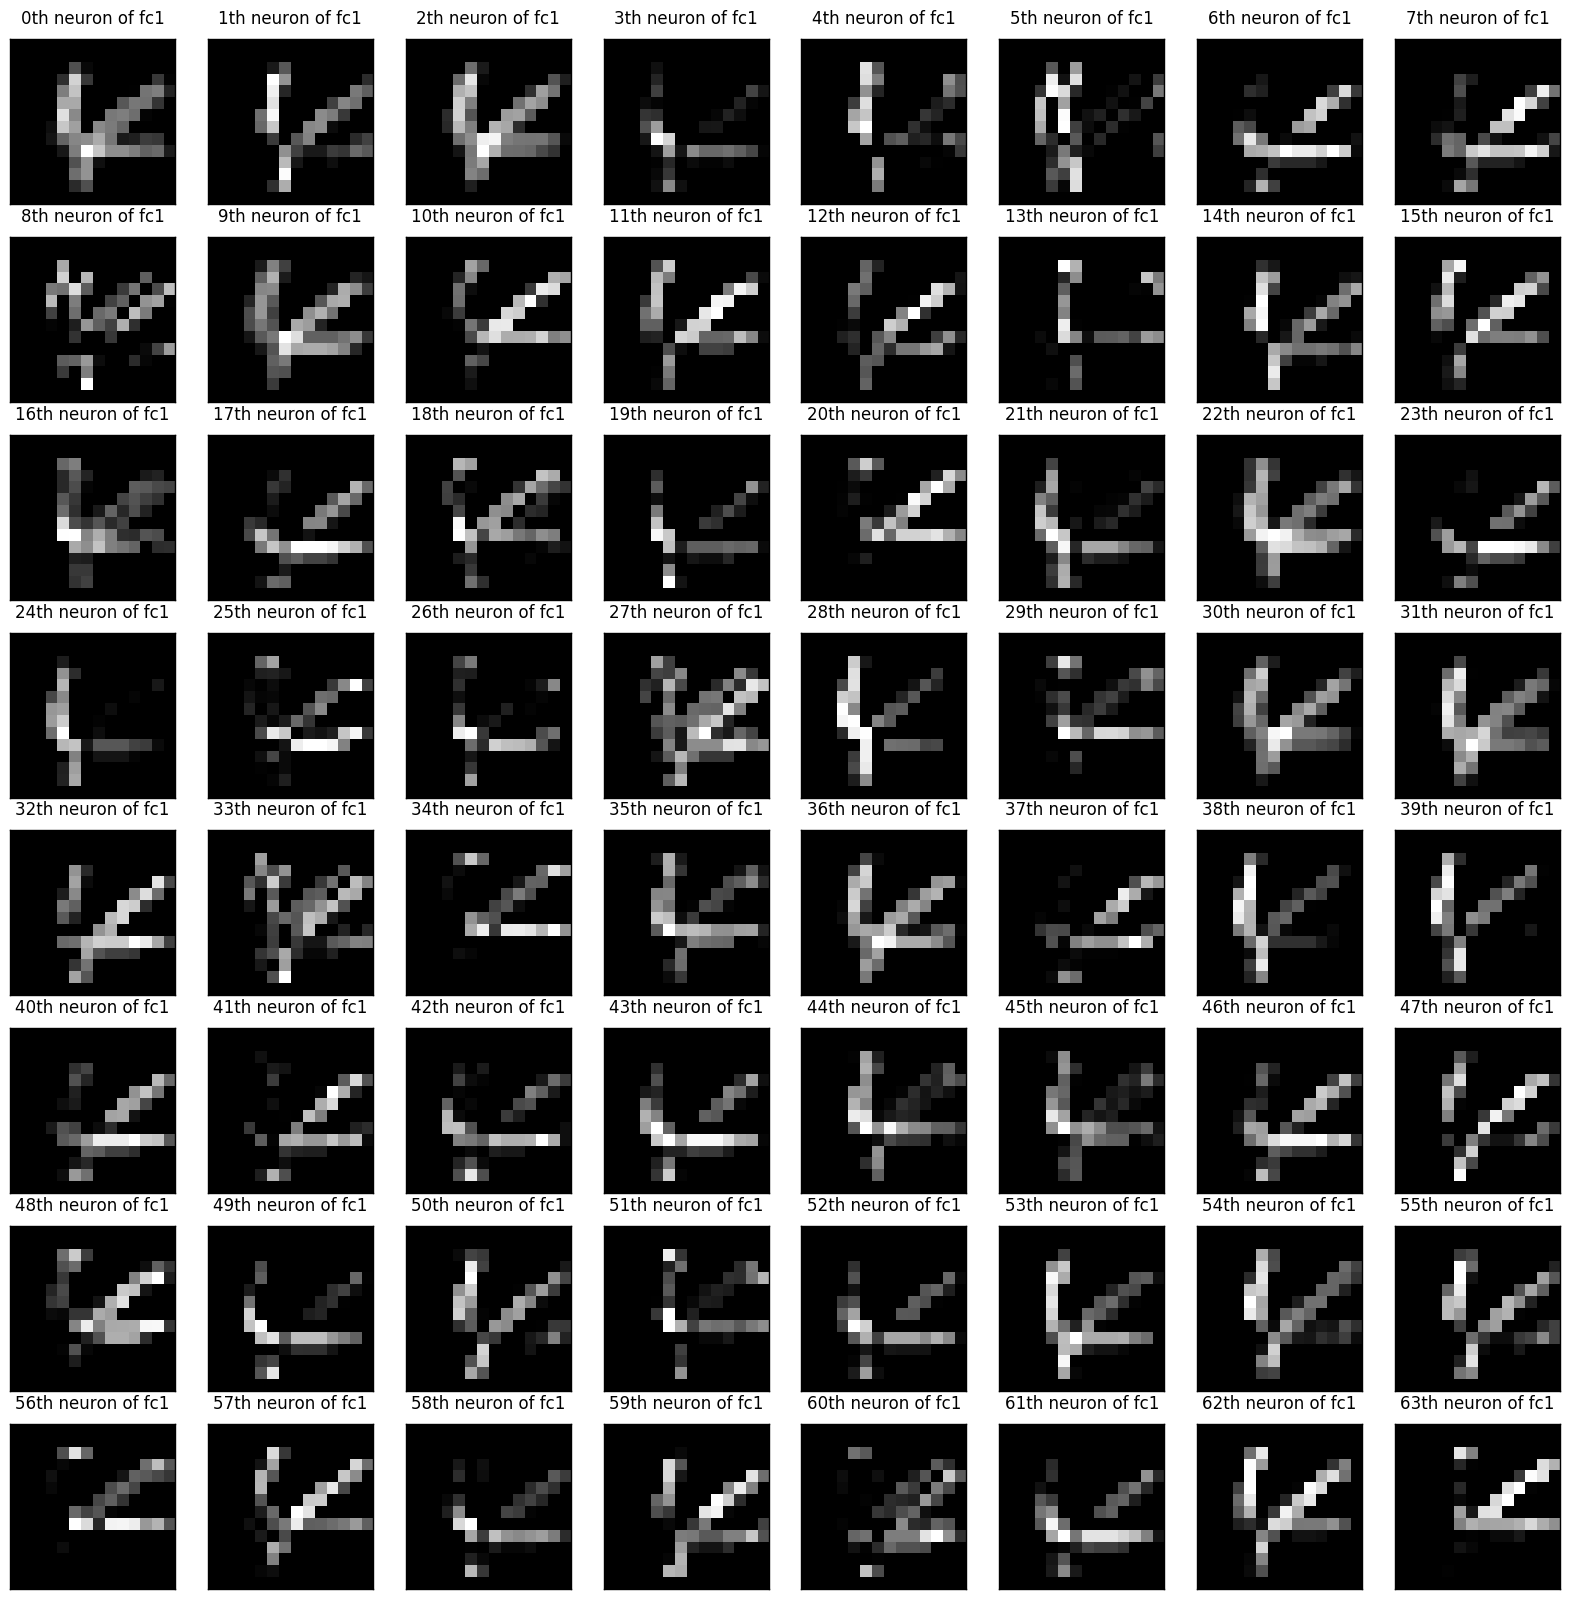

In [142]:
#Create a array iterations of 64 layers
iters = [i for i in range(fc1.shape[3])]

fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(20,20))

for i, ax in zip(iters, axes.ravel()):
    
    ax.matshow(fc1[0, :, :, i], cmap=plt.get_cmap('gray'))
    ax.set_title("" + str(i) + "th neuron of fc1")
    ax.set_xticks(()) #Remove all the ticks
    ax.set_yticks(()) #Remove all the ticks

## Convolution filters (weights)

Size of weight wc1 is (3, 3, 1, 64)


C:\Users\StrikeWade\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


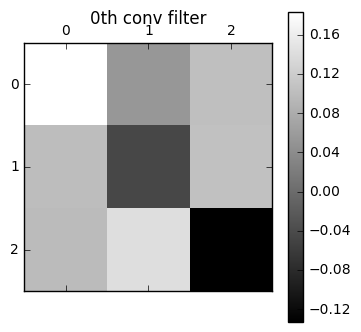

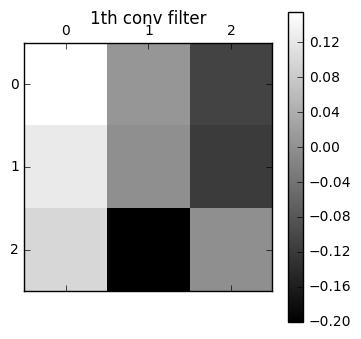

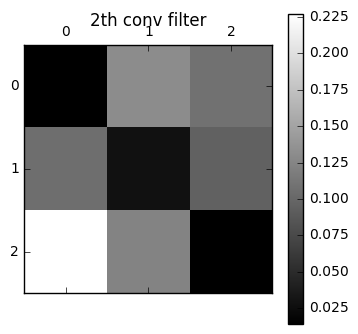

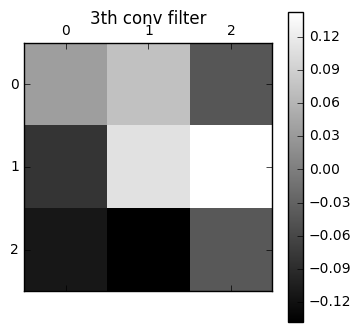

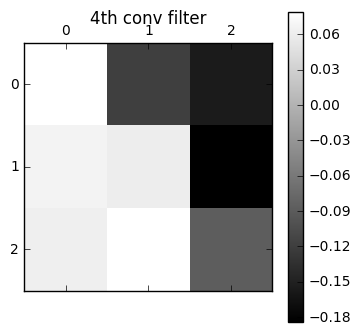

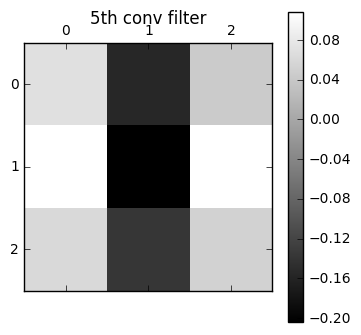

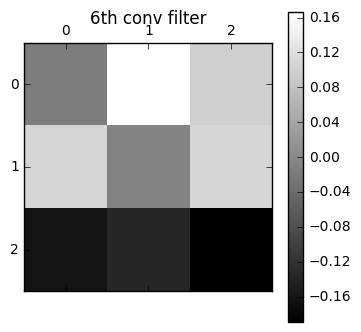

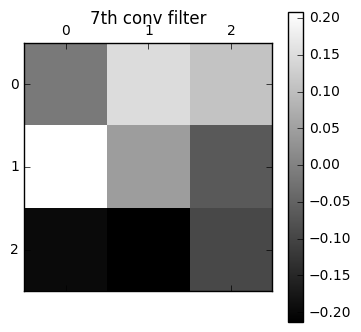

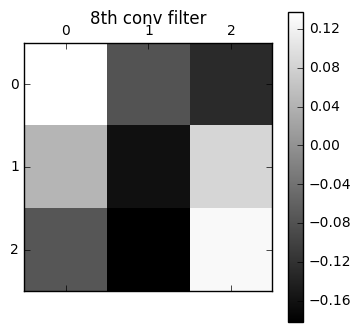

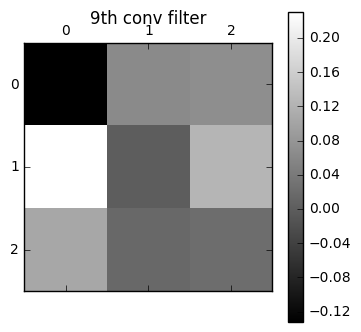

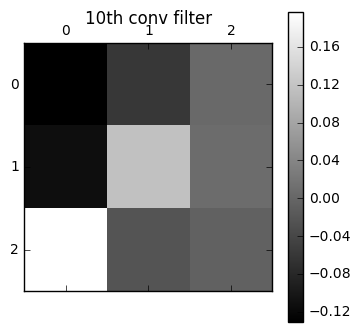

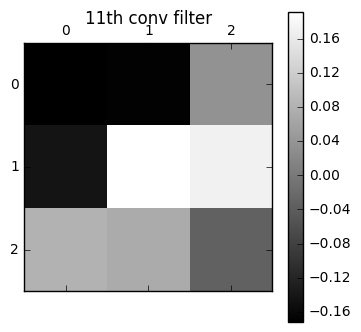

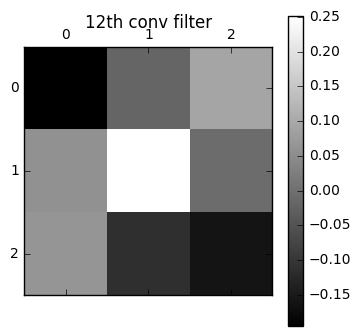

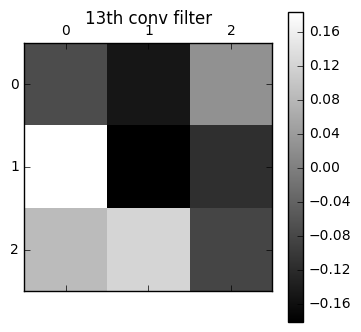

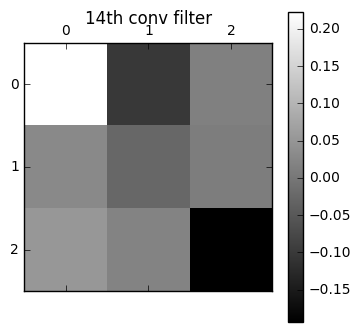

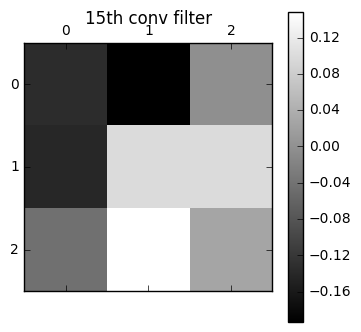

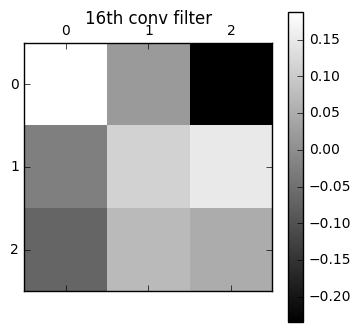

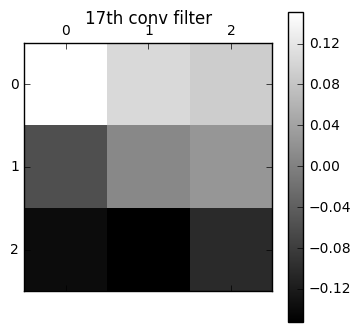

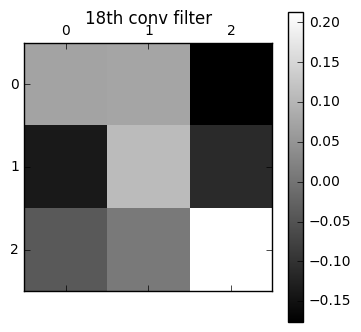

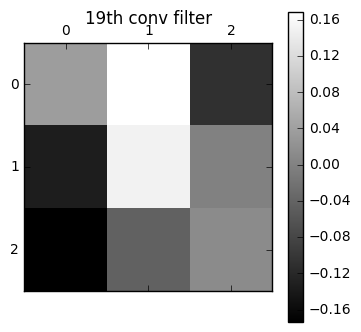

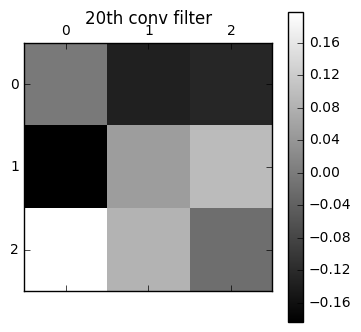

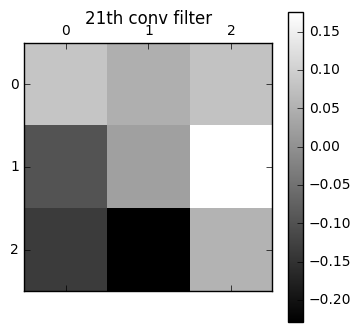

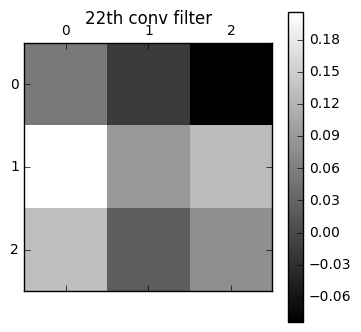

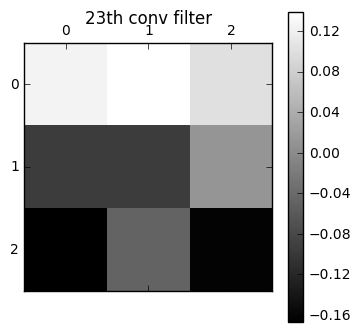

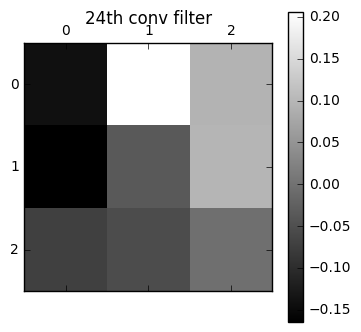

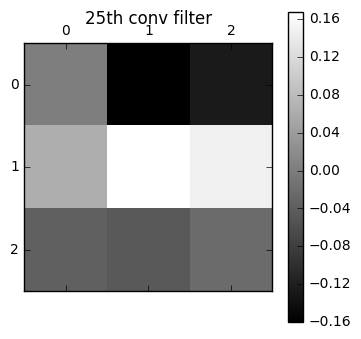

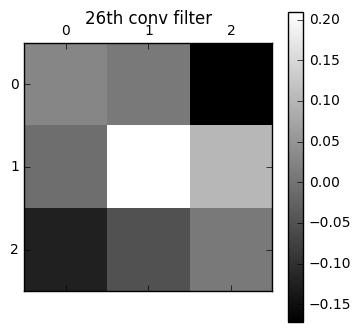

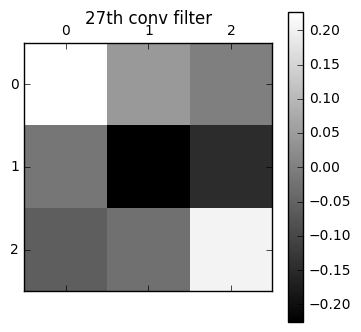

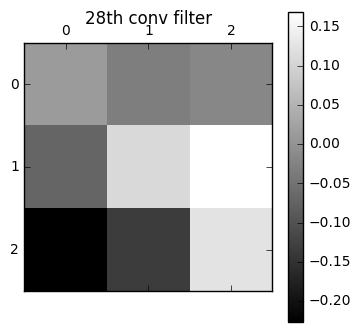

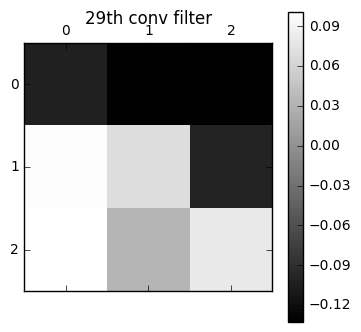

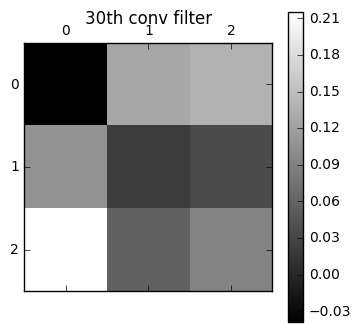

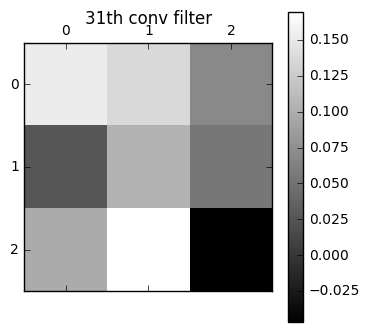

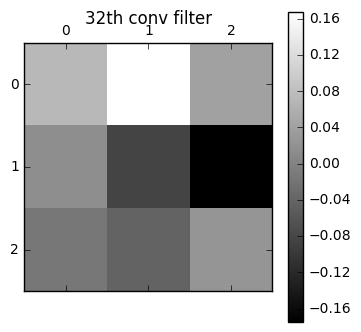

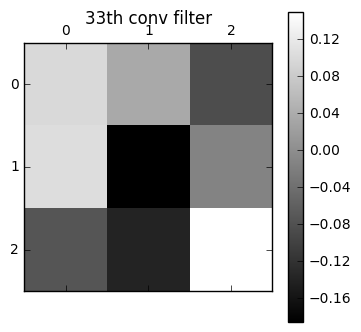

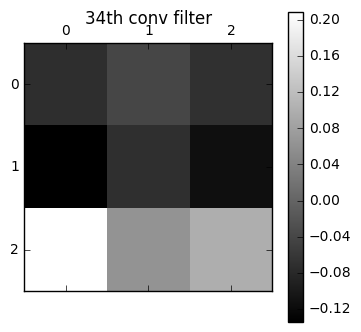

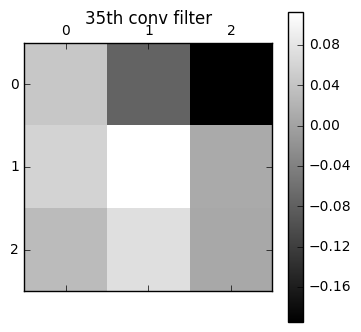

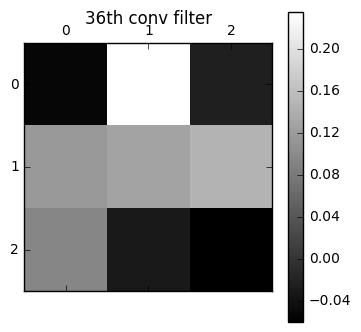

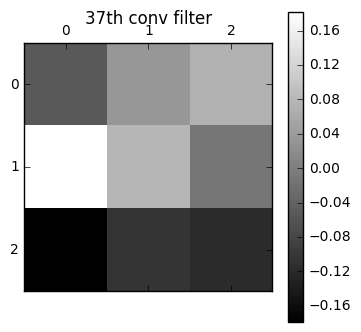

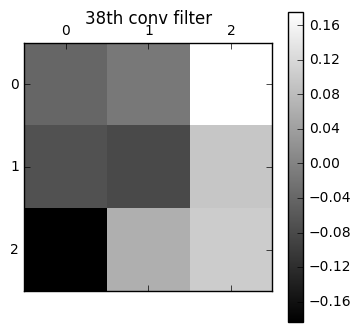

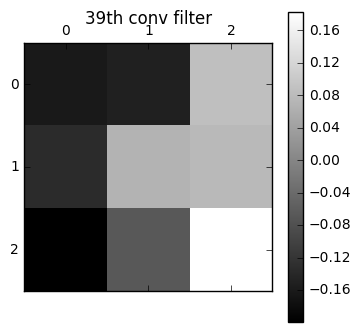

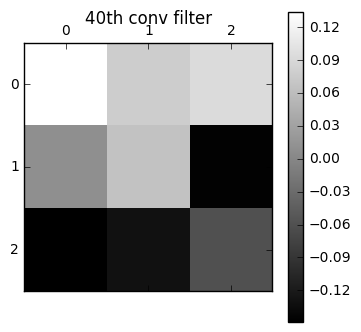

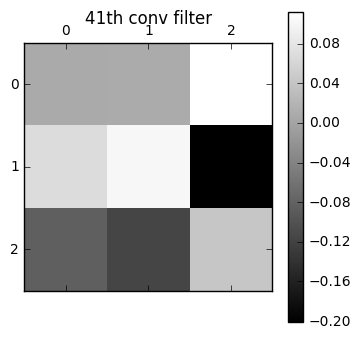

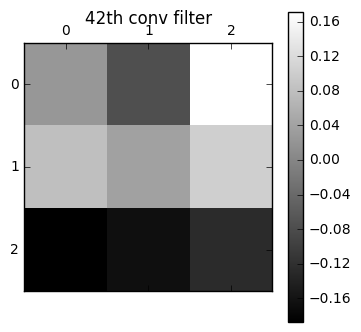

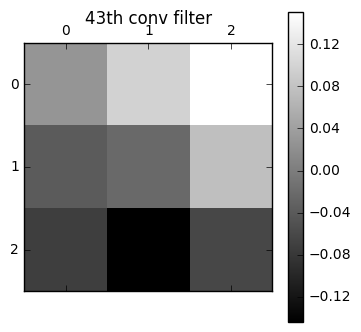

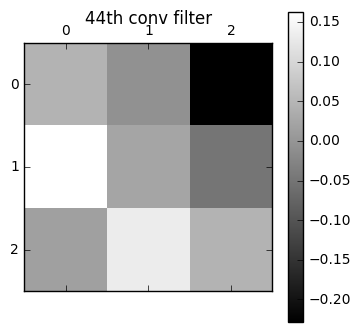

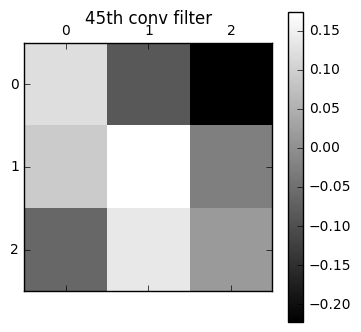

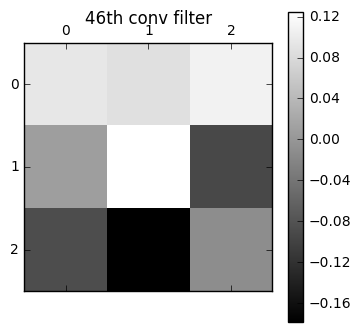

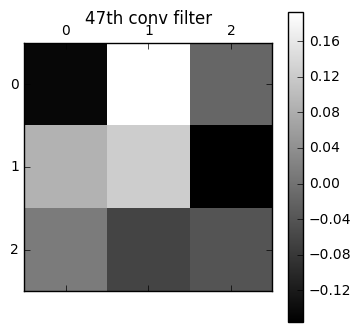

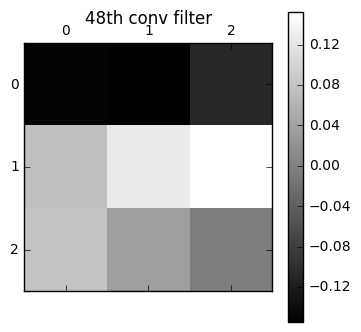

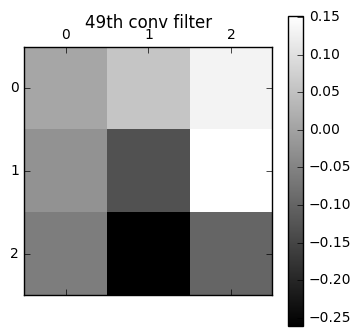

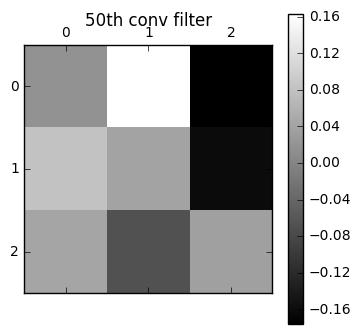

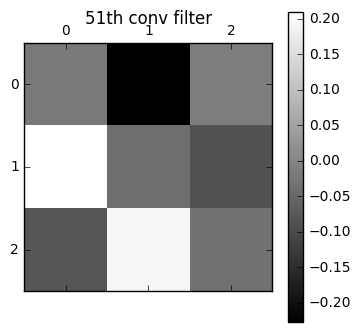

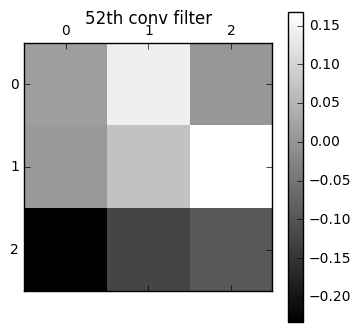

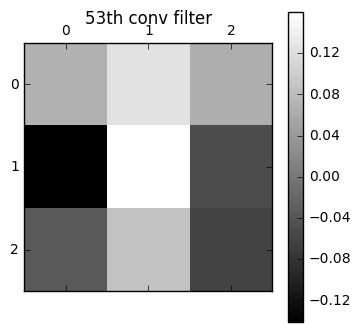

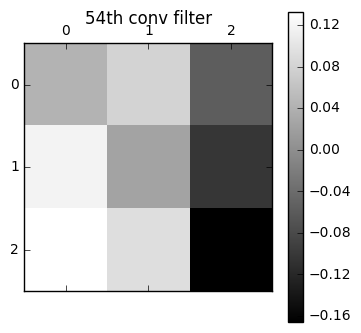

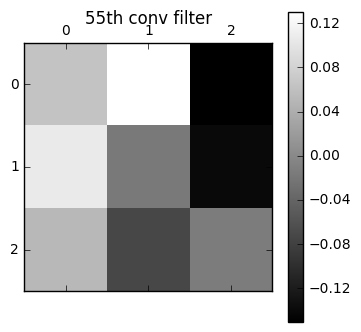

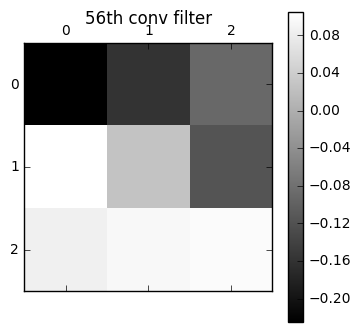

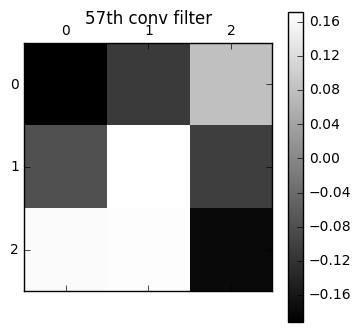

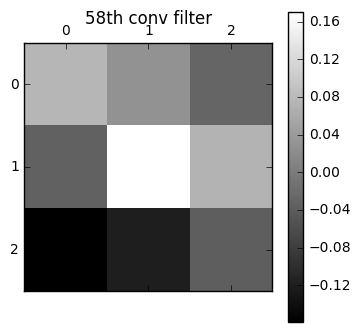

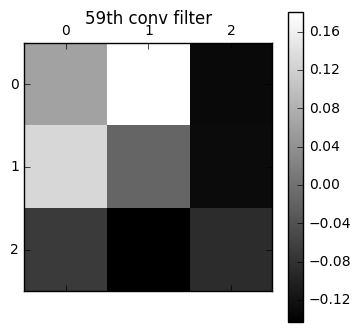

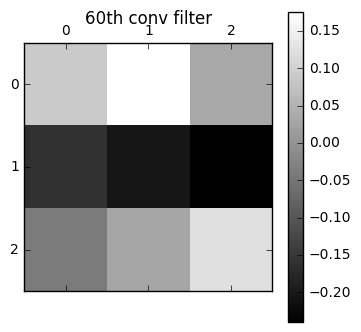

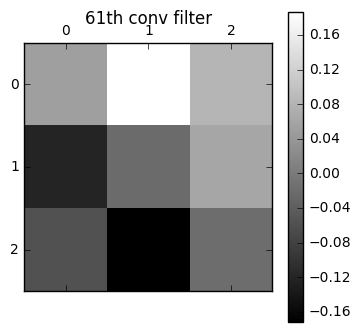

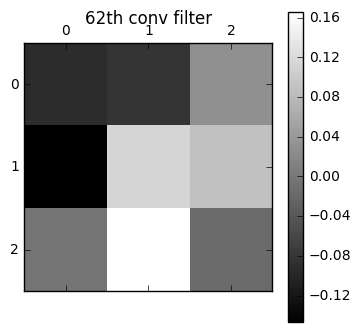

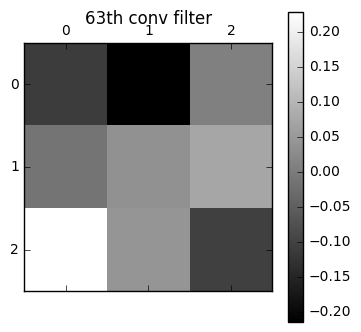

In [146]:
w1 = sess.run(weights['wc1'])
print('Size of weight wc1 is', wc1.shape)
      
#Plot
for i in range(w1.shape[3]):
    plt.matshow(w1[:, :, 0, i], cmap=plt.get_cmap('gray'))
    plt.title(str(i) + "th conv filter")
    plt.colorbar()